In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import re

In [2]:
twitter_data=pd.read_csv("twitter_data.csv")
bitcoin=pd.read_csv("bitcoin.csv")

In [3]:
twitter_data.head()

,Unnamed: 0,tweets,time
0,0,"Wed Mar 24 00:54:43 2021 (1:30)\nUSD : 54,595.75\nWght: 208,291\nBlk#: 676,008\nSize: 1,269.5\nTxs : 1,720\nPool: 31,710 (85.0 MB)\n#bitcoin",2021-03-23 23:55:26
1,1,"Wed Mar 24 00:53:13 2021 (2:17)\nUSD : 54,709.91\nWght: 208,727\nBlk#: 676,007\nSize: 1,419.4\nTxs : 1,876\nPool: 33,099 (85.9 MB)\n#bitcoin",2021-03-23 23:53:56
2,2,"1 Bitcoin ( #BTC )\nDollar: 54,729.00$ \n\n1 Bitcoin Cash ( #BCH )\nDollar: 5,12.43$ \n\n1 Ethereum ( #ETH )\nDollar: 1,67… https://t.co/V7sxz3mHIC",2021-03-23 23:52:27
3,3,"Wed Mar 24 00:50:56 2021 (20:19)\nUSD : 54,629.92\nWght: 208,422\nBlk#: 676,006\nSize: 1,347.0\nTxs : 2,876\nPool: 34,442 (86.6 MB)\n#bitcoin",2021-03-23 23:51:25
4,4,RT @BtcSenti: Bitcoin Fear Index on google search statistics (higher = more market fear) #Bitcoin #BTC #dataviz #datavisualisation 19:00:…,2021-03-23 23:44:00


In [4]:
twitter_data.drop(columns="Unnamed: 0",inplace=True)

In [5]:
twitter_data.head()

,tweets,time
0,"Wed Mar 24 00:54:43 2021 (1:30)\nUSD : 54,595.75\nWght: 208,291\nBlk#: 676,008\nSize: 1,269.5\nTxs : 1,720\nPool: 31,710 (85.0 MB)\n#bitcoin",2021-03-23 23:55:26
1,"Wed Mar 24 00:53:13 2021 (2:17)\nUSD : 54,709.91\nWght: 208,727\nBlk#: 676,007\nSize: 1,419.4\nTxs : 1,876\nPool: 33,099 (85.9 MB)\n#bitcoin",2021-03-23 23:53:56
2,"1 Bitcoin ( #BTC )\nDollar: 54,729.00$ \n\n1 Bitcoin Cash ( #BCH )\nDollar: 5,12.43$ \n\n1 Ethereum ( #ETH )\nDollar: 1,67… https://t.co/V7sxz3mHIC",2021-03-23 23:52:27
3,"Wed Mar 24 00:50:56 2021 (20:19)\nUSD : 54,629.92\nWght: 208,422\nBlk#: 676,006\nSize: 1,347.0\nTxs : 2,876\nPool: 34,442 (86.6 MB)\n#bitcoin",2021-03-23 23:51:25
4,RT @BtcSenti: Bitcoin Fear Index on google search statistics (higher = more market fear) #Bitcoin #BTC #dataviz #datavisualisation 19:00:…,2021-03-23 23:44:00


In [6]:
twitter_data=twitter_data.sort_values(by="time",ignore_index=True)

In [7]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24139 entries, 0 to 24138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  24139 non-null  object
 1   time    24139 non-null  object
dtypes: object(2)
memory usage: 377.3+ KB


In [8]:
from datetime import datetime
twitter_data["time"] = pd.to_datetime(twitter_data['time'])

In [9]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [14]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

In [15]:
twitter_data["clean_tweet"]=twitter_data["tweets"].apply(lambda x:clean_tweet(x))

In [16]:
def analyze_sentiment(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return "positive"
    elif analysis.sentiment.polarity==0:
        return "neutral"
    else:
        return "negative"

In [17]:
twitter_data["sentiment"]=twitter_data["clean_tweet"].apply(lambda x:analyze_sentiment(x))

In [18]:
twitter_data.head()

,tweets,time,clean_tweet,sentiment
0,"Coinstreet Trading AI\nMammon indicator confluence check, 5min retracement soon from 56864.5\n2021-03-17T18:37:55.896… https://t.co/fSkt7VblXP",2021-03-17 18:47:24,Coinstreet Trading AI Mammon indicator confluence check 5min retracement soon from 56864 5 2021 03 17T18 37 55 896,neutral
1,"RT @themachinebuilt: 🔥Bitcoin will go to $20 Million! 📈📈🚀🚀 Come get bullish with us!\n\n@rettlerb, @SpillyGuy @WClementeIII, @burtonoaks, @Li…",2021-03-17 18:57:19,RT Bitcoin will go to 20 Million Come get bullish with us,neutral
2,RT @LitecoinForever: Outgoing Average International Transaction Fees:\nU.S. Bank - $50.00\nWells Fargo Bank - $45.00\nBank of America - $40.00…,2021-03-17 18:58:29,RT Outgoing Average International Transaction Fees U S Bank 50 00 Wells Fargo Bank 45 00 Bank of America 40 00,negative
3,"The price of\nSpaghetti alla Carbonara\nis 19,086 Satoshis\nor 0.00019086 BTC\n\nBTC price: 57,581.90 USD\non Wednesday,… https://t.co/toPhaleEDt",2021-03-17 19:00:01,The price of Spaghetti alla Carbonara is 19 086 Satoshis or 0 00019086 BTC BTC price 57 581 90 USD on Wednesday,neutral
4,Bitcoin Fear Index on google search statistics (higher = more market fear) #Bitcoin #BTC #dataviz… https://t.co/1AIQf9NYcJ,2021-03-17 19:00:05,Bitcoin Fear Index on google search statistics higher more market fear Bitcoin BTC dataviz,positive


In [19]:
twitter_data["sentiment"].value_counts().iplot(kind="bar",xTitle="sentiment",yTitle="count")

In [20]:
all_tweets = ' '.join(tweet for tweet in twitter_data['clean_tweet'])

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(all_tweets)

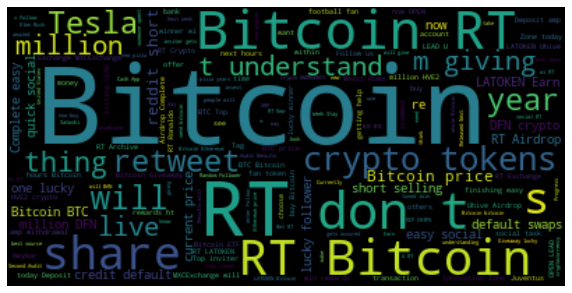

In [22]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

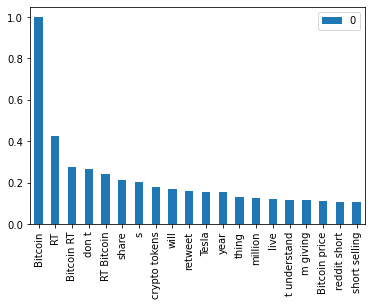

In [23]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
df_freq.plot.bar()
plt.show()

In [24]:
bitcoin.head()

,Unnamed: 0,time,close_price
0,0,2020-03-24 04:00:00,6577.72
1,1,2020-03-25 04:00:00,6747.55
2,2,2020-03-26 04:00:00,6821.95
3,3,2020-03-27 04:00:00,6127.86
4,4,2020-03-28 04:00:00,6219.79


In [25]:
bitcoin.drop(columns="Unnamed: 0",inplace=True)